In [1]:
import warnings

warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [3]:
df = pd.read_csv('../DagsHub/data/CrossValidated-Questions.csv')
df.head()

Id                                              Title  \
0  495508        Accepting null hypothesis given specificity   
1  495507  How do I calculate the probability of victory,...   
2  495506  Is joint modelling with survival and longitudi...   
3  495503    Are Spiking Neural Networks The Next Big Thing?   
4  495502  Public data and examples for practicing distri...   

                                                Body  \
0  <p>In a population of 10000 people, there is a...   
1  <p>If I have a poll of 600 people (standard de...   
2  <p>I would like to know if joint models for su...   
3  <p>Intel recently announced their Loihi chip a...   
4  <p>Are there public data for practicing distri...   

                                                Tags         CreationDate  \
0                                <bayesian><p-value>  2020-11-08 03:59:02   
1  <probability><normal-distribution><t-distribut...  2020-11-08 02:09:11   
2                             <survival><panel-data>  2020-11-08 01:55:08   
3  <machine-learning><neural-networks><sparse><ar...  2020-11-08 00:37:13   
4                             <references><learning>  2020-11-08 00:09:25   

   Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  
0      0          5            0             2            NaN  
1      0         20            0             0            NaN  
2      0          5            0             0            NaN  
3      0         18            0             4            NaN  
4      1         10            0             3            1.0

In [4]:
# preprocessing

In [5]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
# Converting creation date to an int
df['CreationDate_Epoch'] = df['CreationDate'].astype('int64') // 10 ** 9

In [6]:
# We use tags with Ml only
df['MachineLearning'] = df['Tags'].str.contains('machine-learning').fillna(False)

In [7]:
# drop Unecessary columns 
df = df.drop(columns=['Id','Tags'])

In [8]:
df.head()

Title  \
0        Accepting null hypothesis given specificity   
1  How do I calculate the probability of victory,...   
2  Is joint modelling with survival and longitudi...   
3    Are Spiking Neural Networks The Next Big Thing?   
4  Public data and examples for practicing distri...   

                                                Body        CreationDate  \
0  <p>In a population of 10000 people, there is a... 2020-11-08 03:59:02   
1  <p>If I have a poll of 600 people (standard de... 2020-11-08 02:09:11   
2  <p>I would like to know if joint models for su... 2020-11-08 01:55:08   
3  <p>Intel recently announced their Loihi chip a... 2020-11-08 00:37:13   
4  <p>Are there public data for practicing distri... 2020-11-08 00:09:25   

   Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      0          5            0             2            NaN   
1      0         20            0             0            NaN   
2      0          5            0             0            NaN   
3      0         18            0             4            NaN   
4      1         10            0             3            1.0   

   CreationDate_Epoch  MachineLearning  
0          1604807942            False  
1          1604801351            False  
2          1604800508            False  
3          1604795833             True  
4          1604794165            False

In [9]:
df[df['MachineLearning']!= True].sample(5)

Title  \
6267   Reversing order of outcome variable - multinom...   
43475                          How do GANs stay in sync?   
41337           Understanding the example in ?prcomp (R)   
12313  Why do we need to model max, min, and average ...   
23875                       Regression F and t statistic   

                                                    Body        CreationDate  \
6267   <p>Here is a working example of my issue:</p>\... 2020-08-15 06:11:30   
43475  <p>What further research has been done since t... 2019-02-11 02:56:05   
41337  <p>I'm trying to understand, in simple terms, ... 2019-03-16 00:27:28   
12313  <p>For COVID-19, I read many papers who try to... 2020-06-01 09:39:23   
23875  <p>My understanding was that, to make a hypoth... 2020-01-19 20:31:36   

       Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
6267       2         12            0             0            NaN   
43475      1         19            0             0            NaN   
41337      0        168            1             6            1.0   
12313      1         13            0            15            NaN   
23875      1         30            0             2            0.0   

       CreationDate_Epoch  MachineLearning  
6267           1597471890            False  
43475          1549853765            False  
41337          1552696048            False  
12313          1591004363            False  
23875          1579465896            False

In [13]:
df[df['MachineLearning']].sample(5)

Title  \
6246   Providing latitude and longitude to a house pr...   
41541  Apply K-means to the columns of the covariance...   
48300                  Is ID column in a regression bad?   
45792  Translation invariance of features in convolut...   
24637  What is the definition of machine learning (vs...   

                                                    Body        CreationDate  \
6246   <p>I'm new to machine learning, and I'm trying... 2020-08-15 16:49:59   
41541  <p>In Section 5.3 of the paper <a href="https:... 2019-03-13 06:30:14   
48300  <p>Is it always a bad idea to have something l... 2018-11-14 14:01:39   
45792  <p>A big part of using convolutional layers is... 2019-01-02 11:48:06   
24637  <p>I'm in the process of writing about the dif... 2020-01-09 02:01:52   

       Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
6246       4        313            1             3            NaN   
41541      3        203            1             1            NaN   
48300      0        775            1             4            NaN   
45792      1        179            0             0            NaN   
24637      8       1027            4             2            2.0   

       CreationDate_Epoch  MachineLearning  
6246           1597510199             True  
41541          1552458614             True  
48300          1542204099             True  
45792          1546429686             True  
24637          1578535312             True

In [14]:
df['Title_len'] = df.Title.str.len()
df['Body_len'] =df.Body.str.len()

In [15]:
# Data Exploration 

In [18]:
df.describe(include='all')

Title  \
count                                             50000   
unique                                            49972   
top     K means clusters, would PCA be a better option?   
freq                                                  2   
first                                               NaN   
last                                                NaN   
mean                                                NaN   
std                                                 NaN   
min                                                 NaN   
25%                                                 NaN   
50%                                                 NaN   
75%                                                 NaN   
max                                                 NaN   

                                                     Body  \
count                                               50000   
unique                                              49987   
top     <p>Here is the link to the boy or girl paradox...   
freq                                                    2   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

               CreationDate         Score     ViewCount  AnswerCount  \
count                 50000  50000.000000  50000.000000  50000.00000   
unique                49974           NaN           NaN          NaN   
top     2018-11-07 11:05:52           NaN           NaN          NaN   
freq                      2           NaN           NaN          NaN   
first   2018-10-11 17:29:12           NaN           NaN          NaN   
last    2020-11-08 03:59:02           NaN           NaN          NaN   
mean                    NaN      1.121240    154.553100      0.67778   
std                     NaN      2.313259    616.019487      0.80392   
min                     NaN    -14.000000      1.000000      0.00000   
25%                     NaN      0.000000     23.000000      0.00000   
50%                     NaN      1.000000     42.000000      1.00000   
75%                     NaN      1.000000     97.000000      1.00000   
max                     NaN     87.000000  48969.000000     32.00000   

        CommentCount  FavoriteCount  CreationDate_Epoch MachineLearning  \
count   50000.000000    8918.000000        5.000000e+04           50000   
unique           NaN            NaN                 NaN               2   
top              NaN            NaN                 NaN           False   
freq             NaN            NaN                 NaN           44448   
first            NaN            NaN                 NaN             NaN   
last             NaN            NaN                 NaN             NaN   
mean        1.782800       1.366450        1.575066e+09             NaN   
std         2.551077       2.199443        1.878285e+07             NaN   
min         0.000000       0.000000        1.539279e+09             NaN   
25%         0.000000       1.000000        1.558326e+09             NaN   
50%         1.000000       1.000000        1.578066e+09             NaN   
75%         3.000000       1.000000        1.590782e+09             NaN   
max        34.000000      82.000000        1.604808e+09             NaN   

           Title_len     Body_len  
count   50000.000000  50000.00000  
unique           NaN          NaN  
top              NaN          NaN  
freq             NaN          NaN  
first            NaN          NaN  
last             NaN          NaN  
mean       63.073700   1336.45880  
std        25.075001

In [19]:
df.isnull().sum() * 100 / df.shape[0]

Title                  0.000
Body                   0.000
CreationDate           0.000
Score                  0.000
ViewCount              0.000
AnswerCount            0.000
CommentCount           0.000
FavoriteCount         82.164
CreationDate_Epoch     0.000
MachineLearning        0.000
Title_len              0.000
Body_len               0.000
dtype: float64

11.104 % Labeled True 


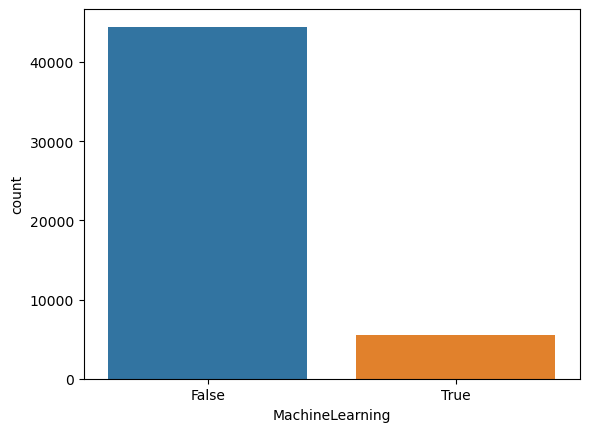

In [21]:
sns.countplot(x='MachineLearning',data=df)
print(f"{df['MachineLearning'].mean()*100}% Labeled True ")

In [25]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]